In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('user_measurements.csv')  

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
data[['weight', 'age', 'height']] = imputer.fit_transform(data[['weight', 'age', 'height']])

In [3]:
# Extract features and labels
features = data[['weight', 'age', 'height']]  # Replace with actual feature columns
labels = data['size']  # Replace with actual label column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Save the model 
joblib.dump(rf_model, 'rf_model.pkl')

# Load the model 
rf_model = joblib.load('rf_model.pkl')

# Predict the sizes for the test set
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 51.21%


In [5]:
# Create a predict function for new data
def predict_size(new_measurement):
    scaled_measurement = scaler.transform([new_measurement])
    predicted_size = rf_model.predict(scaled_measurement)[0]
    return predicted_size

# Example prediction
new_user_measurements = [55, 25, 160]  # Replace with actual measurements
predicted_size = predict_size(new_user_measurements)
print(f'Predicted Size: {predicted_size}')

Predicted Size: M


c:\Users\tashv\OneDrive\Desktop\GRID\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


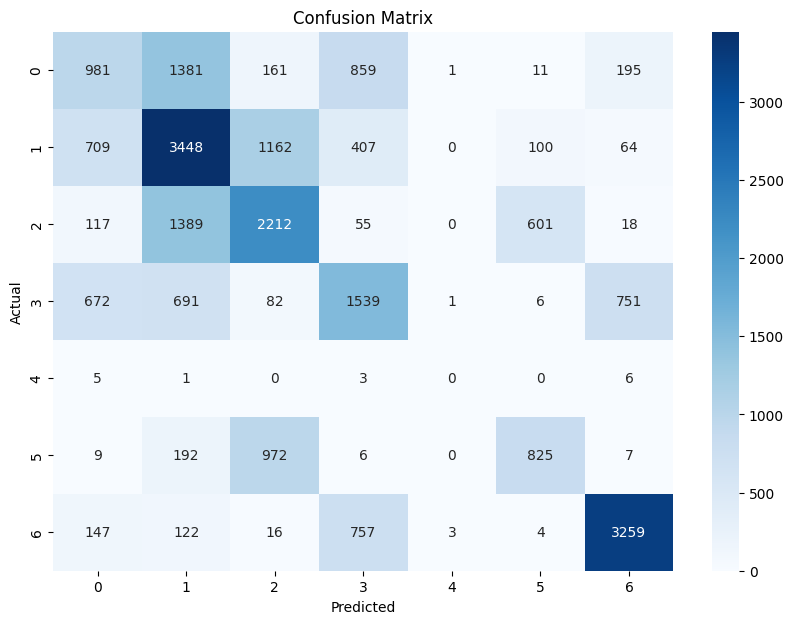

In [6]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

